In [1]:
#import libraries
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
#!pip install pandas_datareader #installs apple Inc stock prices from 1-1-2011 to 31-12-2016
import datetime
from pandas_datareader import DataReader
%matplotlib inline
Apple = DataReader("AAPL", "yahoo", start=datetime.datetime(2011, 1, 1), end=datetime.datetime(2016,12,31))
Apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,46.211430,45.901428,46.135715,46.080002,48377000.0,30.726294
2011-01-03,47.180000,46.405716,46.520000,47.081429,111284600.0,31.394041
2011-01-04,47.500000,46.878571,47.491428,47.327145,77270200.0,31.557884
2011-01-05,47.762856,47.071430,47.078571,47.714287,63879900.0,31.816027
2011-01-06,47.892857,47.557144,47.817142,47.675713,75107200.0,31.790306


/home/vineeta/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


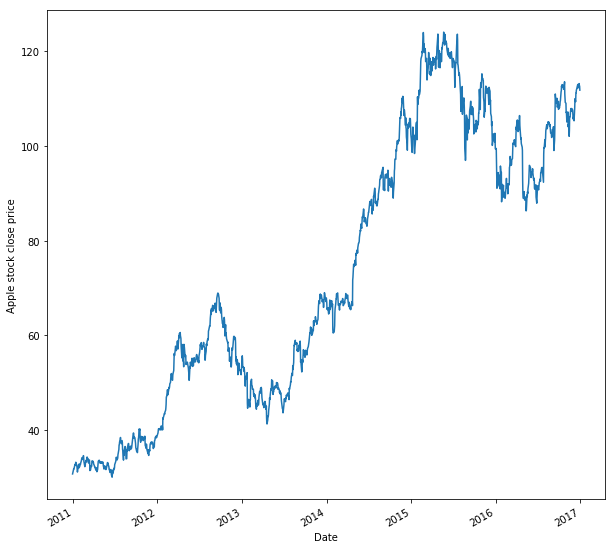

In [3]:
#plot stock price graph
close = Apple['Adj Close']
plt.figure(figsize= (10,10))
close.plot()
plt.ylabel("Apple stock close price")
plt.show()

/home/vineeta/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


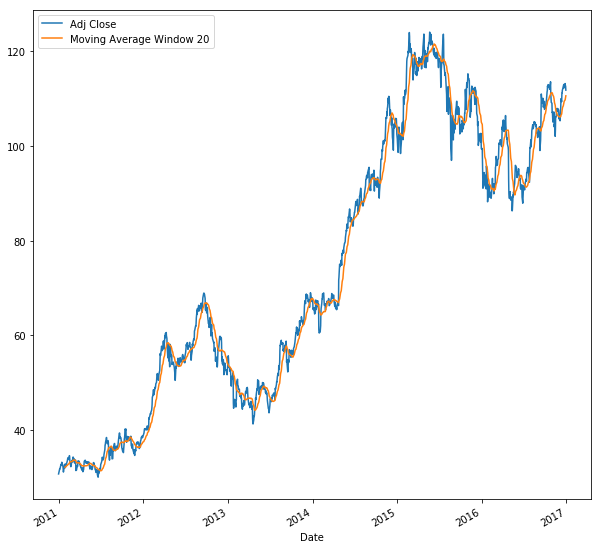

In [4]:
#Calculating trend by moving average

moving_average = close.rolling(window=20).mean()
plt.figure(figsize= (10,10))
close.plot(label='Adj Close')
moving_average.plot(label='Moving Average Window 20')
plt.legend(loc='best')
plt.show()

/home/vineeta/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


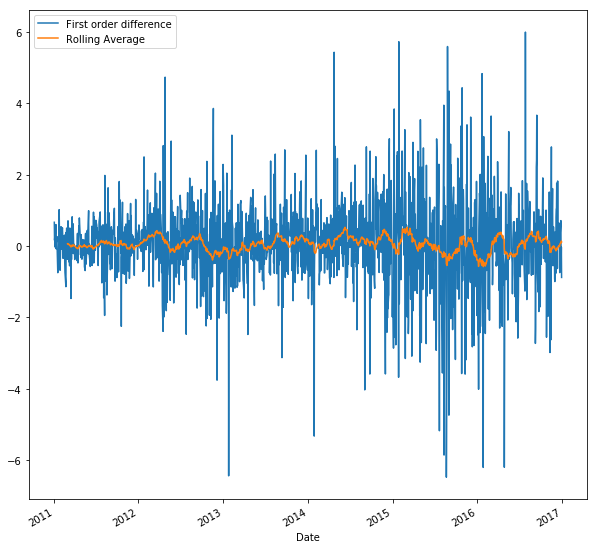

In [5]:
#detrending the data ie difference moving average and original signal
fod = close.diff()
plt.figure(figsize= (10,10))
fod.plot(label='First order difference')
fod.rolling(window=40).mean().\
plot(label='Rolling Average')
plt.legend(loc='best')
plt.show()

/home/vineeta/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


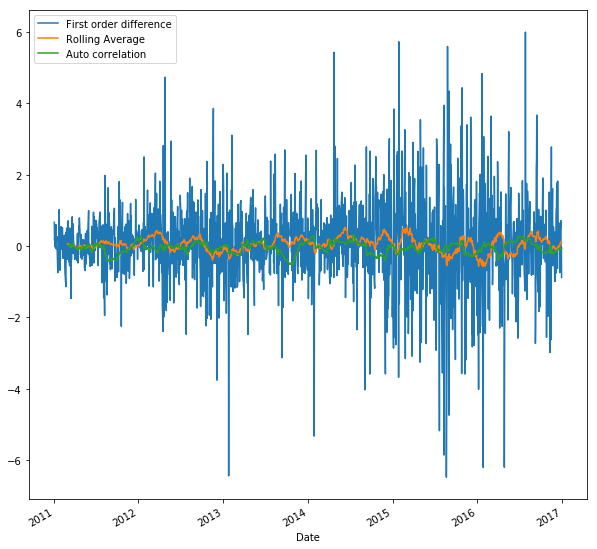

In [6]:
#Calculating Seasonality ie regularly repeating patterns of high and low by calculating autocorrelation 
plt.figure(figsize= (10,10))
fod.plot(label='First order difference')
fod.rolling(window=40).mean().\
plot(label='Rolling Average')
fod.rolling(window=40).corr(fod.shift(5)).\
plot(label='Auto correlation')
plt.legend(loc='best')
plt.show()

<Figure size 720x720 with 0 Axes>

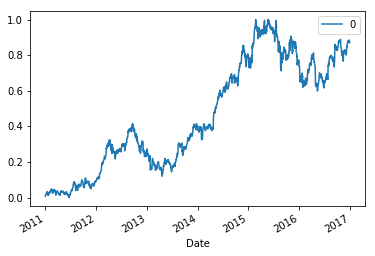

In [7]:
#After checking stationarity we can use regression models.

# Normalization of the data to use sliding window transform for regression
from sklearn.preprocessing import MinMaxScaler
def normalize(data):
    x = data.values.reshape(-1,1)
    pre_process = MinMaxScaler()
    x_normalized = pre_process.fit_transform(x)
    return x_normalized

x_norm = normalize(close)

plt.figure(figsize= (10,10))
pd.DataFrame(x_norm, index = close.index).plot(label="Normalized Stock prices")
plt.legend(loc='best')
plt.show()

In [8]:
#window transform coverts the data series into a sequence of input-output pairr for regression.

def window_transform(series, window_size):
    X = []
    y = []
# Generate a sequence input/output pairs from series
# x= <s1,s2,s3,s4,s5,... s_n> y = s_n+1 and so on
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
# reshape each
        X = np.asarray(X)
        X.shape = (np.shape(X)[0:2])
        y = np.asarray(y)
        y.shape = (len(y),1)
        return X,y

window_size = 7
X,y = window_transform(x_norm,window_size = window_size)

In [9]:
X [:5]

array([[0.00733326, 0.01443339, 0.01617553, 0.01892034, 0.01864686,
        0.02106761, 0.02747917]])

In [10]:
y[:5]

array([[0.02665877]])